## Técnicas de correpondência automática de pontos em imagens sobrepostas

Existem diversos algoritmos ques objetivam buscar por pontos correspondentes: 
- Scale Invariant Feature Transform (SIFT);
- Speeded-Up Robust Features (SURF);
- Oriented FAST and Rotated BRIEF (ORB);
- Detector-Free Local Feature Matching with Transformers (LoFTR) - https://github.com/zju3dv/LoFTR;
- Self-Supervised Interest Point Detection and Description (SuperPoint) - https://github.com/rpautrat/SuperPoint;
- Grid-Based Motion Statistics for Fast, Ultra-Robust Feature Correspondence (GMS) - https://github.com/germain-hug/GMS-Feature-Correspondence
- ...

<img src="data/SIFT.png">

O ganho em quantidade de pontos correspondentes é seguido pela inserção de outliers indesejados.

### Exemplo - SIFT

Matches 1097
Mostrabdo os 10 melhores:


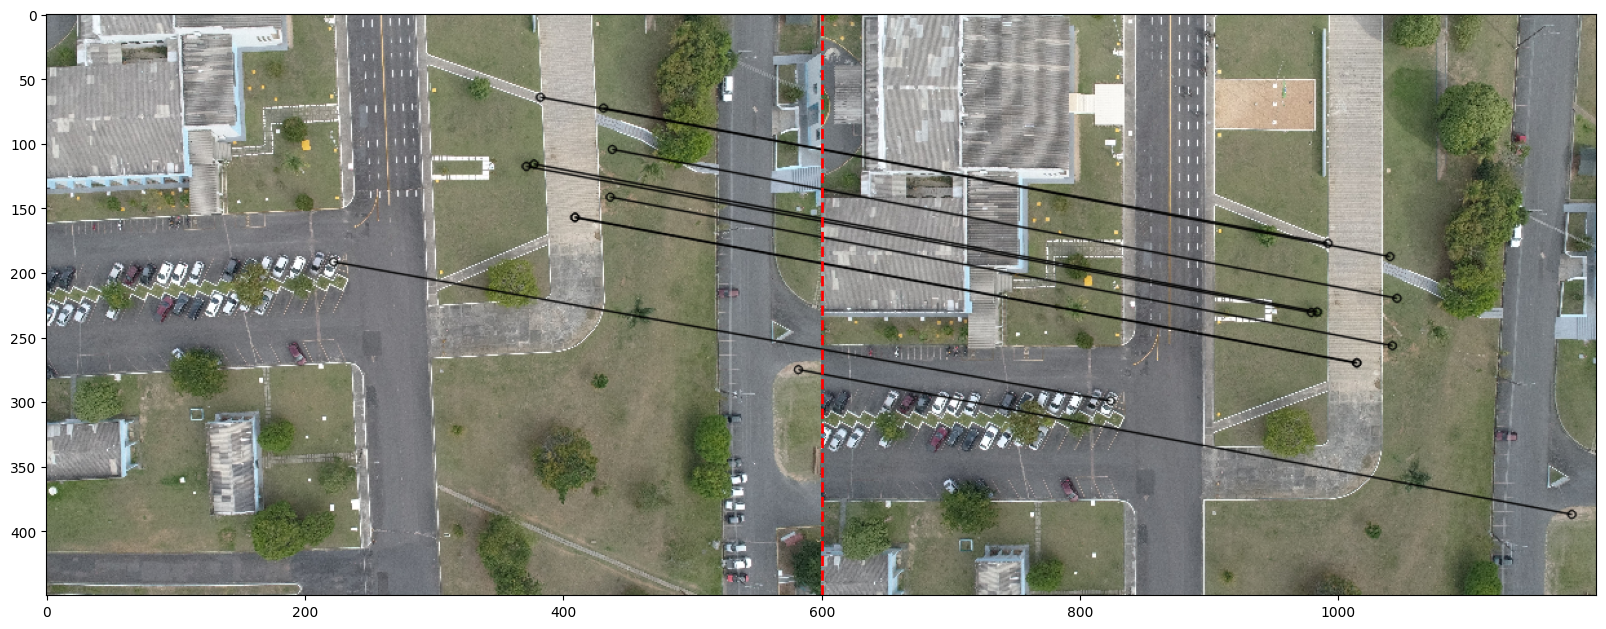

(437.94873046875, 105.00990295410156) = (445.4479064941406, 220.0634765625)
(409.0426025390625, 157.47569274902344) = (414.27215576171875, 270.0614013671875)
(431.13909912109375, 73.0391616821289) = (439.9725036621094, 187.8667755126953)
(409.0426025390625, 157.47569274902344) = (414.27215576171875, 270.0614013671875)
(377.2960510253906, 116.31642150878906) = (383.59619140625, 230.59104919433594)
(382.3382568359375, 64.6163558959961) = (392.0323486328125, 177.55723571777344)
(581.976806640625, 275.22601318359375) = (580.8265380859375, 387.17474365234375)
(371.3470153808594, 118.14678192138672) = (379.1640319824219, 231.00392150878906)
(436.292724609375, 141.8085479736328) = (441.884765625, 256.7328186035156)
(222.26905822753906, 191.91485595703125) = (223.742431640625, 299.4454345703125)


In [6]:
# Load the images
img = []
img.append(f'aux_data/FOTOS_VOO/DJI_0019.JPG')
img.append(f'aux_data/FOTOS_VOO/DJI_0020.JPG')

import matplotlib.pyplot as plt
import numpy as np
import cv2


###### Resize to be more fast
def resize(img):
    original_height, original_width = img.shape[:2]
    
    # Define new width while maintaining the aspect ratio
    new_width = 600
    aspect_ratio = new_width / original_width
    new_height = int(original_height * aspect_ratio)  # Compute height based on aspect ratio
    
    # Resize the image
    return cv2.resize(img, (new_width, new_height))


img0_raw = cv2.imread(img[0])
img0_raw = resize(img0_raw)
img0_rgb = cv2.cvtColor(img0_raw, cv2.COLOR_BGR2RGB)
img0_gray = cv2.cvtColor(img0_raw, cv2.COLOR_BGR2GRAY)

img1_raw = cv2.imread(img[1])
img1_raw = resize(img1_raw)
img1_rgb = cv2.cvtColor(img1_raw, cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(img1_raw, cv2.COLOR_BGR2GRAY)

# Detect keypoints and compute descriptors
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp0, des0 = sift.detectAndCompute(img0_gray,None)
img0 = cv2.drawKeypoints(img0_rgb, kp0, img0_raw)
kp1, des1 = sift.detectAndCompute(img1_gray,None)
img1 = cv2.drawKeypoints(img1_rgb, kp1, img1_raw)

bf = cv2.BFMatcher()
# Match descriptors.
matches = bf.match(des0,des1)
# Sort them in the order of their distances. --> Lower is better
matches = sorted(matches, key = lambda x:x.distance)
print("Matches",len(matches))
k = 10
print(f"Mostrabdo os {k} melhores:")

img3 = cv2.drawMatches(img0_rgb,kp0,img1_rgb,kp1,matches[:k],None,
                              matchColor=(0, 0, 0),
                              flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

f, a = plt.subplots(figsize = (20,15))
# Draw a vertical line at the half of the width
a.axvline(x=img0_raw.shape[1], color='red', linestyle='--', linewidth=2)
# a.axis('off')
plt.imshow(img3)
plt.show()

list_kp0 = [kp0[mat.queryIdx].pt for mat in matches]
list_kp1 = [kp1[mat.trainIdx].pt for mat in matches]

for i in range(0, len(matches[:k])):
    print(list_kp0[i],"=",list_kp1[i])